### 数据预处理

#### 合并数据

##### 数字经济版块处理

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tsmoothie

In [313]:
data = pd.read_excel('附表.xlsx',sheet_name='数字经济版块信息').drop('序号', axis=1)
data = data[::-1].reset_index(drop=True)
data.head()

,时间,指数代码,开盘价,收盘价,最高价,最低价,成交量,成交额
0,2021/7/14 9:35,931582.CSI,1650.743,1656.1278,1656.1278,1645.3176,784942350,10676367200
1,2021/7/14 9:40,931582.CSI,1656.4562,1660.884,1660.884,1655.7565,295226270,5120971800
2,2021/7/14 9:45,931582.CSI,1661.4821,1651.1367,1661.5465,1651.1367,170324450,3554307000
3,2021/7/14 9:50,931582.CSI,1650.1067,1651.6909,1652.0685,1647.2009,202485930,4249628000
4,2021/7/14 9:55,931582.CSI,1651.9265,1650.0445,1654.9518,1649.1442,125101600,3105998000


In [314]:
data.isnull().sum()

时间      0
指数代码    0
开盘价     0
收盘价     0
最高价     0
最低价     0
成交量     0
成交额     0
dtype: int64

In [315]:
data['date']=pd.to_datetime(pd.to_datetime(data['时间'],format="%Y/%m/%d %H:%M").dt.strftime("%Y-%m-%d"))
data.head()

,时间,指数代码,开盘价,收盘价,最高价,最低价,成交量,成交额,date
0,2021/7/14 9:35,931582.CSI,1650.743,1656.1278,1656.1278,1645.3176,784942350,10676367200,2021-07-14
1,2021/7/14 9:40,931582.CSI,1656.4562,1660.884,1660.884,1655.7565,295226270,5120971800,2021-07-14
2,2021/7/14 9:45,931582.CSI,1661.4821,1651.1367,1661.5465,1651.1367,170324450,3554307000,2021-07-14
3,2021/7/14 9:50,931582.CSI,1650.1067,1651.6909,1652.0685,1647.2009,202485930,4249628000,2021-07-14
4,2021/7/14 9:55,931582.CSI,1651.9265,1650.0445,1654.9518,1649.1442,125101600,3105998000,2021-07-14


##### 宏观市场指标1

In [316]:
data1=pd.read_excel('附表.xlsx',sheet_name='宏观市场指标1')
data1 = data1[::-1].reset_index(drop=True)
data1.head()

,指标名称,中国战略性新兴产业采购经理指数(EPMI):当月值,社会消费品零售总额:当月值,全国:居民消费价格指数:当期值,股票市场:期末市价总值,中国香港:少于10万元人民币的存款利率:12个月:期内平均数,金融机构人民币贷款利率区间占比:等于LPR
0,2020-12-31,55.6,"40,566.00",100.2,"797,238.00",0.35,7.02
1,2021-01-31,50.6,NaN,99.7,"801,629.00",0.35,7.51
2,2021-02-28,43.7,NaN,99.8,"800,790.00",0.35,7.02
3,2021-03-31,63.1,"35,484.10",100.4,"783,730.00",0.35,8.42
4,2021-04-30,63.7,"33,152.60",100.9,"803,272.00",0.35,7.46


In [317]:
print(data1.isnull().sum())
data1.fillna(method='ffill',inplace=True)
print(data1.isnull().sum())

指标名称                              0
中国战略性新兴产业采购经理指数(EPMI):当月值         0
社会消费品零售总额:当月值                     3
全国:居民消费价格指数:当期值                   1
股票市场:期末市价总值                       1
中国香港:少于10万元人民币的存款利率:12个月:期内平均数    0
金融机构人民币贷款利率区间占比:等于LPR             1
dtype: int64
指标名称                              0
中国战略性新兴产业采购经理指数(EPMI):当月值         0
社会消费品零售总额:当月值                     0
全国:居民消费价格指数:当期值                   0
股票市场:期末市价总值                       0
中国香港:少于10万元人民币的存款利率:12个月:期内平均数    0
金融机构人民币贷款利率区间占比:等于LPR             0
dtype: int64


In [318]:
data1['指标名称']=pd.to_datetime(data1['指标名称'])

In [319]:
df1 = pd.DataFrame(pd.date_range(start='2020-12-31',end='2022-01-31', freq='D'),columns=['dt'])
df1

,dt
0,2020-12-31
1,2021-01-01
2,2021-01-02
3,2021-01-03
4,2021-01-04
...,...
392,2022-01-27
393,2022-01-28
394,2022-01-29
395,2022-01-30


In [320]:
df=df1.merge(data1, left_on='dt', right_on='指标名称', how='outer')
df.head()

,dt,指标名称,中国战略性新兴产业采购经理指数(EPMI):当月值,社会消费品零售总额:当月值,全国:居民消费价格指数:当期值,股票市场:期末市价总值,中国香港:少于10万元人民币的存款利率:12个月:期内平均数,金融机构人民币贷款利率区间占比:等于LPR
0,2020-12-31,2020-12-31,55.6,"40,566.00",100.2,"797,238.00",0.35,7.02
1,2021-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-03,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-04,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
df.fillna(method='ffill',inplace=True)

In [322]:
df.isnull().sum()

dt                                0
指标名称                              0
中国战略性新兴产业采购经理指数(EPMI):当月值         0
社会消费品零售总额:当月值                     0
全国:居民消费价格指数:当期值                   0
股票市场:期末市价总值                       0
中国香港:少于10万元人民币的存款利率:12个月:期内平均数    0
金融机构人民币贷款利率区间占比:等于LPR             0
dtype: int64

In [323]:
data.columns

Index(['时间', '指数代码', '开盘价', '收盘价', '最高价', '最低价', '成交量', '成交额', 'date'], dtype='object')

In [324]:
df.columns

Index(['dt', '指标名称', '中国战略性新兴产业采购经理指数(EPMI):当月值', '社会消费品零售总额:当月值',
       '全国:居民消费价格指数:当期值', '股票市场:期末市价总值', '中国香港:少于10万元人民币的存款利率:12个月:期内平均数',
       '金融机构人民币贷款利率区间占比:等于LPR'],
      dtype='object')

In [325]:
data = data.merge(df, left_on='date', right_on='dt', how='outer')

In [326]:
data.head()

,时间,指数代码,开盘价,收盘价,最高价,最低价,成交量,成交额,date,dt,指标名称,中国战略性新兴产业采购经理指数(EPMI):当月值,社会消费品零售总额:当月值,全国:居民消费价格指数:当期值,股票市场:期末市价总值,中国香港:少于10万元人民币的存款利率:12个月:期内平均数,金融机构人民币贷款利率区间占比:等于LPR
0,2021/7/14 9:35,931582.CSI,1650.743,1656.1278,1656.1278,1645.3176,784942350,10676367200,2021-07-14,2021-07-14,2021-06-30,54.7,"37,585.80",101.1,"863,734.00",0.35,8.07
1,2021/7/14 9:40,931582.CSI,1656.4562,1660.884,1660.884,1655.7565,295226270,5120971800,2021-07-14,2021-07-14,2021-06-30,54.7,"37,585.80",101.1,"863,734.00",0.35,8.07
2,2021/7/14 9:45,931582.CSI,1661.4821,1651.1367,1661.5465,1651.1367,170324450,3554307000,2021-07-14,2021-07-14,2021-06-30,54.7,"37,585.80",101.1,"863,734.00",0.35,8.07
3,2021/7/14 9:50,931582.CSI,1650.1067,1651.6909,1652.0685,1647.2009,202485930,4249628000,2021-07-14,2021-07-14,2021-06-30,54.7,"37,585.80",101.1,"863,734.00",0.35,8.07
4,2021/7/14 9:55,931582.CSI,1651.9265,1650.0445,1654.9518,1649.1442,125101600,3105998000,2021-07-14,2021-07-14,2021-06-30,54.7,"37,585.80",101.1,"863,734.00",0.35,8.07


In [327]:
data.columns

Index(['时间', '指数代码', '开盘价', '收盘价', '最高价', '最低价', '成交量', '成交额', 'date', 'dt',
       '指标名称', '中国战略性新兴产业采购经理指数(EPMI):当月值', '社会消费品零售总额:当月值', '全国:居民消费价格指数:当期值',
       '股票市场:期末市价总值', '中国香港:少于10万元人民币的存款利率:12个月:期内平均数',
       '金融机构人民币贷款利率区间占比:等于LPR'],
      dtype='object')

In [328]:
del data['指标名称']

##### 宏观市场指标2

In [329]:
data2 = pd.read_excel('附表.xlsx',sheet_name='宏观市场指标2')
data2 = data2[::-1].reset_index(drop=True)
data2 = data2.drop(data2.columns[2], axis=1).dropna()
data2

,指标名称,GDP:现价
10,2020-12,"98,539.60"
11,2021-03,"82,661.67"
12,2021-06,"93,842.67"
13,2021-09,"96,639.77"
14,2021-12,"108,079.13"


In [330]:
data2['指标名称']=pd.to_datetime(data2['指标名称'])
df1=pd.DataFrame(pd.date_range(start='2020-12-31',end='2022-01-31', freq='D'),columns=['datetemp'])
df=df1.merge(data2, left_on='datetemp', right_on='指标名称', how='outer')
df.fillna(method='ffill',inplace=True)
data=data.merge(df, left_on='dt', right_on='datetemp', how='outer')
del data['datetemp']
# del data['指数代码']
data.head()

,时间,指数代码,开盘价,收盘价,最高价,最低价,成交量,成交额,date,dt,中国战略性新兴产业采购经理指数(EPMI):当月值,社会消费品零售总额:当月值,全国:居民消费价格指数:当期值,股票市场:期末市价总值,中国香港:少于10万元人民币的存款利率:12个月:期内平均数,金融机构人民币贷款利率区间占比:等于LPR,指标名称,GDP:现价
0,2021/7/14 9:35,931582.CSI,1650.743,1656.1278,1656.1278,1645.3176,784942350,10676367200,2021-07-14,2021-07-14,54.7,"37,585.80",101.1,"863,734.00",0.35,8.07,2021-06-01,"93,842.67"
1,2021/7/14 9:40,931582.CSI,1656.4562,1660.884,1660.884,1655.7565,295226270,5120971800,2021-07-14,2021-07-14,54.7,"37,585.80",101.1,"863,734.00",0.35,8.07,2021-06-01,"93,842.67"
2,2021/7/14 9:45,931582.CSI,1661.4821,1651.1367,1661.5465,1651.1367,170324450,3554307000,2021-07-14,2021-07-14,54.7,"37,585.80",101.1,"863,734.00",0.35,8.07,2021-06-01,"93,842.67"
3,2021/7/14 9:50,931582.CSI,1650.1067,1651.6909,1652.0685,1647.2009,202485930,4249628000,2021-07-14,2021-07-14,54.7,"37,585.80",101.1,"863,734.00",0.35,8.07,2021-06-01,"93,842.67"
4,2021/7/14 9:55,931582.CSI,1651.9265,1650.0445,1654.9518,1649.1442,125101600,3105998000,2021-07-14,2021-07-14,54.7,"37,585.80",101.1,"863,734.00",0.35,8.07,2021-06-01,"93,842.67"


##### 国内市场指标

In [331]:
data3 = pd.read_excel('附表.xlsx',sheet_name='国内市场指标')
data3 = data3[::-1].reset_index(drop=True)
data3

,指标名称,成交量:上证综合指数,成交金额:上证综合指数,沪市:股票:流通市值,深市:股票:流通市值,沪深300指数,上证综合指数,中证500指数,创业板指数,上证50指数,上证A股指数,深证成份指数,深证综合指数
0,2020-12-31,335.67,"4,504.82","38,001,298,905,159.00","26,359,230,106,521.98","5,211.29","3,473.07","6,367.11","2,966.26","3,640.64","3,640.46","14,470.68","2,329.37"
1,2021-01-04,380.79,"5,233.68","38,307,523,852,019.00","26,929,285,323,274.67","5,267.72","3,502.96","6,482.79","3,078.11","3,643.36","3,671.76","14,827.47","2,386.54"
2,2021-01-05,408.00,"5,680.19","38,574,706,812,753.00","27,488,870,162,927.12","5,368.50","3,528.68","6,539.73","3,097.98","3,683.36","3,698.76","15,147.57","2,422.34"
3,2021-01-06,370.23,"5,218.00","38,822,500,039,400.00","27,472,708,006,030.90","5,417.67","3,550.88","6,528.14","3,115.09","3,736.65","3,722.08","15,187.61","2,421.51"
4,2021-01-07,405.35,"5,457.10","39,144,015,097,151.00","27,516,296,168,775.09","5,513.66","3,576.20","6,538.12","3,162.40","3,808.07","3,748.67","15,356.40","2,426.66"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,2022-01-24,280.27,"3,580.10","42,403,459,000,000.00","30,208,215,012,977.33","4,786.74","3,524.11","6,979.25","3,056.43","3,209.74","3,693.10","14,081.80","2,392.24"
259,2022-01-25,327.35,"3,837.28","41,311,349,000,000.00","29,242,339,250,235.79","4,678.45","3,433.06","6,743.96","2,974.96","3,144.95","3,597.65","13,683.89","2,313.06"
260,2022-01-26,275.12,"3,383.12","41,601,616,000,000.00","29,431,560,499,732.47","4,712.31","3,455.67","6,782.58","3,004.41","3,163.67","3,621.42","13,780.30","2,329.17"
261,2022-01-27,280.61,"3,465.34","40,874,163,000,000.00","28,594,084,987,393.53","4,619.88","3,394.25","6,605.92","2,906.76","3,119.24","3,556.99","13,398.84","2,262.41"


In [332]:
data3.isnull().sum()

指标名称           0
成交量:上证综合指数     0
成交金额:上证综合指数    0
沪市:股票:流通市值     0
深市:股票:流通市值     0
沪深300指数        0
上证综合指数         0
中证500指数        0
创业板指数          0
上证50指数         0
上证A股指数         0
深证成份指数         0
深证综合指数         0
dtype: int64

In [333]:
data3['指标名称']=pd.to_datetime(data3['指标名称'])
df1=pd.DataFrame(pd.date_range(start='2020-12-31',end='2022-01-28', freq='D'),columns=['datetemp'])
df=df1.merge(data3, left_on='datetemp', right_on='指标名称', how='outer')
df.fillna(method='ffill',inplace=True)
data=data.merge(df, left_on='dt', right_on='datetemp', how='outer')
del data['datetemp']
del data['指标名称_x']
del data['指标名称_y']
data.head()

,时间,指数代码,开盘价,收盘价,最高价,最低价,成交量,成交额,date,dt,...,沪市:股票:流通市值,深市:股票:流通市值,沪深300指数,上证综合指数,中证500指数,创业板指数,上证50指数,上证A股指数,深证成份指数,深证综合指数
0,2021/7/14 9:35,931582.CSI,1650.743,1656.1278,1656.1278,1645.3176,784942350,10676367200,2021-07-14,2021-07-14,...,"40,326,117,000,000.00","29,086,602,605,532.88","5,083.08","3,528.50","6,898.75","3,488.63","3,339.38","3,698.17","15,056.32","2,470.07"
1,2021/7/14 9:40,931582.CSI,1656.4562,1660.884,1660.884,1655.7565,295226270,5120971800,2021-07-14,2021-07-14,...,"40,326,117,000,000.00","29,086,602,605,532.88","5,083.08","3,528.50","6,898.75","3,488.63","3,339.38","3,698.17","15,056.32","2,470.07"
2,2021/7/14 9:45,931582.CSI,1661.4821,1651.1367,1661.5465,1651.1367,170324450,3554307000,2021-07-14,2021-07-14,...,"40,326,117,000,000.00","29,086,602,605,532.88","5,083.08","3,528.50","6,898.75","3,488.63","3,339.38","3,698.17","15,056.32","2,470.07"
3,2021/7/14 9:50,931582.CSI,1650.1067,1651.6909,1652.0685,1647.2009,202485930,4249628000,2021-07-14,2021-07-14,...,"40,326,117,000,000.00","29,086,602,605,532.88","5,083.08","3,528.50","6,898.75","3,488.63","3,339.38","3,698.17","15,056.32","2,470.07"
4,2021/7/14 9:55,931582.CSI,1651.9265,1650.0445,1654.9518,1649.1442,125101600,3105998000,2021-07-14,2021-07-14,...,"40,326,117,000,000.00","29,086,602,605,532.88","5,083.08","3,528.50","6,898.75","3,488.63","3,339.38","3,698.17","15,056.32","2,470.07"


In [334]:
data['dt']

0      2021-07-14
1      2021-07-14
2      2021-07-14
3      2021-07-14
4      2021-07-14
          ...    
6503   2022-01-23
6504   2022-01-29
6505   2022-01-30
6506   2022-01-31
6507   2022-01-31
Name: dt, Length: 6508, dtype: datetime64[ns]

##### 技术指标

In [335]:
data4=pd.read_excel('附表.xlsx',sheet_name='技术指标')
data4 = data4[::-1].reset_index(drop=True)
del data4['序号']
data4

,时间,指数代码,VMA,VMACD,ARBR,OBV,BBI,DMA,MA,EXPMA,MTM,MACD,BIAS,KDJ,RSI,BOLL
0,2020-12-31,931582.CSI,"3,146,732,142.0000","155,104,574.0687",--,"26,494,349.7619","1,562.0318",-9.9585,"1,562.1266","1,572.9359",57.5060,1.4650,3.9147,76.9862,76.7753,"1,557.8407"
1,2021-01-04,931582.CSI,"3,508,389,101.6000","233,602,454.3539",--,"26,914,422.3763","1,575.4617",-2.8591,"1,579.6941","1,592.2798",86.2796,7.0433,4.6595,84.6575,80.8123,"1,562.1773"
2,2021-01-05,931582.CSI,"4,051,265,963.0000","358,259,198.8696",--,"27,417,002.1695","1,594.9678",6.8779,"1,610.7320","1,624.3745",145.4341,15.9280,7.4948,89.7716,88.0337,"1,568.1330"
3,2021-01-06,931582.CSI,"4,157,778,929.0000","352,557,209.0415",--,"27,038,882.9705","1,610.3065",19.2655,"1,636.9585","1,642.1148",144.2208,21.8325,6.0056,90.8251,81.0618,"1,572.8639"
4,2021-01-07,931582.CSI,"4,107,641,572.4000","350,040,161.7740",--,"27,424,483.5711","1,625.3711",30.4846,"1,660.1821","1,658.9845",146.2611,27.4165,6.2154,93.8834,83.2565,"1,576.7056"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,2022-01-24,931582.CSI,"636,986,729.0000","-143,964,798.3503",75.6889,"26,713,665.1539","1,477.9348",-72.6075,"1,475.4627","1,467.5466",23.6093,-23.0112,0.1454,46.3405,43.5236,"1,512.1893"
259,2022-01-25,931582.CSI,"622,117,441.8000","-127,360,018.2228",77.1409,"26,643,201.2455","1,469.5617",-70.6495,"1,461.5084","1,454.4695",-50.0165,-25.1476,-2.0834,33.7455,30.4463,"1,506.6485"
260,2022-01-26,931582.CSI,"612,131,299.2000","-123,156,788.6274",76.3509,"26,700,806.5074","1,464.0789",-69.6820,"1,453.2434","1,449.8084",-57.6006,-25.5638,-1.1272,29.7790,38.0791,"1,502.5250"
261,2022-01-27,931582.CSI,"619,529,298.0000","-113,004,684.5442",65.8411,"26,636,362.4125","1,451.1536",-70.4890,"1,435.6546","1,429.6618",-92.4424,-29.6764,-4.3847,20.1666,24.5186,"1,495.7303"


In [336]:
data4['指数代码'].unique()

array(['931582.CSI'], dtype=object)

In [337]:
del data4['指数代码']

In [338]:
data4.isnull().sum()

时间       0
VMA      0
VMACD    0
ARBR     0
OBV      0
BBI      0
DMA      0
MA       0
EXPMA    0
MTM      0
MACD     0
BIAS     0
KDJ      0
RSI      0
BOLL     0
dtype: int64

In [339]:
data4['时间']=pd.to_datetime(data4['时间'])
df1=pd.DataFrame(pd.date_range(start='2020-12-31',end='2022-01-28', freq='D'),columns=['datetemp'])
df=df1.merge(data4, left_on='datetemp', right_on='时间', how='outer')
df.fillna(method='ffill',inplace=True)

In [340]:
df = df.drop(['时间'], axis=1)

In [341]:
data=data.merge(df, left_on='dt', right_on='datetemp', how='outer')
del data['datetemp']
data.head()

,时间,指数代码,开盘价,收盘价,最高价,最低价,成交量,成交额,date,dt,...,BBI,DMA,MA,EXPMA,MTM,MACD,BIAS,KDJ,RSI,BOLL
0,2021/7/14 9:35,931582.CSI,1650.743,1656.1278,1656.1278,1645.3176,784942350,10676367200,2021-07-14,2021-07-14,...,"1,643.3478",60.0293,"1,652.8669","1,647.0035",20.0153,18.5679,-0.3913,54.1783,48.0352,"1,620.3182"
1,2021/7/14 9:40,931582.CSI,1656.4562,1660.884,1660.884,1655.7565,295226270,5120971800,2021-07-14,2021-07-14,...,"1,643.3478",60.0293,"1,652.8669","1,647.0035",20.0153,18.5679,-0.3913,54.1783,48.0352,"1,620.3182"
2,2021/7/14 9:45,931582.CSI,1661.4821,1651.1367,1661.5465,1651.1367,170324450,3554307000,2021-07-14,2021-07-14,...,"1,643.3478",60.0293,"1,652.8669","1,647.0035",20.0153,18.5679,-0.3913,54.1783,48.0352,"1,620.3182"
3,2021/7/14 9:50,931582.CSI,1650.1067,1651.6909,1652.0685,1647.2009,202485930,4249628000,2021-07-14,2021-07-14,...,"1,643.3478",60.0293,"1,652.8669","1,647.0035",20.0153,18.5679,-0.3913,54.1783,48.0352,"1,620.3182"
4,2021/7/14 9:55,931582.CSI,1651.9265,1650.0445,1654.9518,1649.1442,125101600,3105998000,2021-07-14,2021-07-14,...,"1,643.3478",60.0293,"1,652.8669","1,647.0035",20.0153,18.5679,-0.3913,54.1783,48.0352,"1,620.3182"


In [342]:
data.columns

Index(['时间', '指数代码', '开盘价', '收盘价', '最高价', '最低价', '成交量', '成交额', 'date', 'dt',
       '中国战略性新兴产业采购经理指数(EPMI):当月值', '社会消费品零售总额:当月值', '全国:居民消费价格指数:当期值',
       '股票市场:期末市价总值', '中国香港:少于10万元人民币的存款利率:12个月:期内平均数',
       '金融机构人民币贷款利率区间占比:等于LPR', 'GDP:现价', '成交量:上证综合指数', '成交金额:上证综合指数',
       '沪市:股票:流通市值', '深市:股票:流通市值', '沪深300指数', '上证综合指数', '中证500指数', '创业板指数',
       '上证50指数', '上证A股指数', '深证成份指数', '深证综合指数', 'VMA', 'VMACD', 'ARBR', 'OBV',
       'BBI', 'DMA', 'MA', 'EXPMA', 'MTM', 'MACD', 'BIAS', 'KDJ', 'RSI',
       'BOLL'],
      dtype='object')

##### 国际市场指标

In [343]:
data5=pd.read_excel('附表.xlsx',sheet_name='国际市场指标')[::-1].reset_index(drop=True)
data5

,指标名称,道琼斯工业平均指数,纳斯达克综合指数,标准普尔500指数,美国证交所,恒生指数,东京日经225指数,伦敦金融时报100指数,法国巴黎CAC40指数,荷兰AEX指数,俄罗斯RTS指数,意大利MIB指数
0,2020/12/31 0:00,"30,606.48","12,888.28","3,756.07","2,360.90","27,231.13",NaN,"6,460.52","5,551.41",624.61,NaN,NaN
1,2021/1/4 0:00,"30,223.89","12,698.45","3,700.65","2,368.95","27,472.81","27,258.38","6,571.88","5,588.96",631.03,"1,424.84","22,315.87"
2,2021/1/5 0:00,"30,391.60","12,818.96","3,726.86","2,462.98","27,649.86","27,158.63","6,612.25","5,564.60",633.62,"1,426.11","22,198.50"
3,2021/1/6 0:00,"30,829.40","12,740.79","3,748.14","2,504.08","27,692.30","27,055.94","6,841.86","5,630.60",639.16,"1,436.71","22,734.32"
4,2021/1/7 0:00,"31,041.13","13,067.48","3,803.79","2,536.10","27,548.52","27,490.13","6,856.96","5,669.85",637.41,NaN,"22,746.08"
...,...,...,...,...,...,...,...,...,...,...,...,...
282,2022/1/25 0:00,"34,297.73","13,539.29","4,356.45","3,577.92","24,243.61","27,131.34","7,371.46","6,837.96",739.86,"1,296.80","26,028.89"
283,2022/1/26 0:00,"34,168.09","13,542.12","4,349.93","3,574.33","24,289.90","27,011.33","7,469.78","6,981.96",752.43,"1,324.40","26,619.25"
284,2022/1/27 0:00,"34,160.78","13,352.78","4,326.51","3,559.21","23,807.00","26,170.30","7,554.31","7,023.80",753.79,"1,399.64","26,882.47"
285,2022/1/28 0:00,"34,725.47","13,770.57","4,431.85","3,586.85","23,550.08","26,717.34","7,466.07","6,965.88",744.26,"1,407.04","26,565.41"


In [344]:
data5.isnull().sum()

指标名称            0
道琼斯工业平均指数      14
纳斯达克综合指数       14
标准普尔500指数      14
美国证交所          14
恒生指数           18
东京日经225指数      23
伦敦金融时报100指数    13
法国巴黎CAC40指数     7
荷兰AEX指数         7
俄罗斯RTS指数       12
意大利MIB指数       10
dtype: int64

In [345]:
data.columns

Index(['时间', '指数代码', '开盘价', '收盘价', '最高价', '最低价', '成交量', '成交额', 'date', 'dt',
       '中国战略性新兴产业采购经理指数(EPMI):当月值', '社会消费品零售总额:当月值', '全国:居民消费价格指数:当期值',
       '股票市场:期末市价总值', '中国香港:少于10万元人民币的存款利率:12个月:期内平均数',
       '金融机构人民币贷款利率区间占比:等于LPR', 'GDP:现价', '成交量:上证综合指数', '成交金额:上证综合指数',
       '沪市:股票:流通市值', '深市:股票:流通市值', '沪深300指数', '上证综合指数', '中证500指数', '创业板指数',
       '上证50指数', '上证A股指数', '深证成份指数', '深证综合指数', 'VMA', 'VMACD', 'ARBR', 'OBV',
       'BBI', 'DMA', 'MA', 'EXPMA', 'MTM', 'MACD', 'BIAS', 'KDJ', 'RSI',
       'BOLL'],
      dtype='object')

In [346]:
data5['指标名称']=pd.to_datetime(data5['指标名称'])
df1=pd.DataFrame(pd.date_range(start='2020-12-31',end='2022-01-31', freq='D'),columns=['datetemp'])
df=df1.merge(data5, left_on='datetemp', right_on='指标名称', how='outer')
df.fillna(method='ffill',inplace=True)
data=data.merge(df, left_on='dt', right_on='datetemp', how='outer')
del data['datetemp']
del data['指标名称']
data.head()

,时间,指数代码,开盘价,收盘价,最高价,最低价,成交量,成交额,date,dt,...,纳斯达克综合指数,标准普尔500指数,美国证交所,恒生指数,东京日经225指数,伦敦金融时报100指数,法国巴黎CAC40指数,荷兰AEX指数,俄罗斯RTS指数,意大利MIB指数
0,2021/7/14 9:35,931582.CSI,1650.743,1656.1278,1656.1278,1645.3176,784942350,10676367200,2021-07-14,2021-07-14,...,"14,644.95","4,374.30","3,022.18","27,787.46","28,608.49","7,091.19","6,558.38",744.95,"1,625.77","25,201.50"
1,2021/7/14 9:40,931582.CSI,1656.4562,1660.884,1660.884,1655.7565,295226270,5120971800,2021-07-14,2021-07-14,...,"14,644.95","4,374.30","3,022.18","27,787.46","28,608.49","7,091.19","6,558.38",744.95,"1,625.77","25,201.50"
2,2021/7/14 9:45,931582.CSI,1661.4821,1651.1367,1661.5465,1651.1367,170324450,3554307000,2021-07-14,2021-07-14,...,"14,644.95","4,374.30","3,022.18","27,787.46","28,608.49","7,091.19","6,558.38",744.95,"1,625.77","25,201.50"
3,2021/7/14 9:50,931582.CSI,1650.1067,1651.6909,1652.0685,1647.2009,202485930,4249628000,2021-07-14,2021-07-14,...,"14,644.95","4,374.30","3,022.18","27,787.46","28,608.49","7,091.19","6,558.38",744.95,"1,625.77","25,201.50"
4,2021/7/14 9:55,931582.CSI,1651.9265,1650.0445,1654.9518,1649.1442,125101600,3105998000,2021-07-14,2021-07-14,...,"14,644.95","4,374.30","3,022.18","27,787.46","28,608.49","7,091.19","6,558.38",744.95,"1,625.77","25,201.50"


In [347]:
del data['date']

In [348]:
data.dtypes

时间                                        object
指数代码                                      object
开盘价                                       object
收盘价                                       object
最高价                                       object
最低价                                       object
成交量                                       object
成交额                                       object
dt                                datetime64[ns]
中国战略性新兴产业采购经理指数(EPMI):当月值                float64
社会消费品零售总额:当月值                             object
全国:居民消费价格指数:当期值                          float64
股票市场:期末市价总值                               object
中国香港:少于10万元人民币的存款利率:12个月:期内平均数           float64
金融机构人民币贷款利率区间占比:等于LPR                    float64
GDP:现价                                    object
成交量:上证综合指数                               float64
成交金额:上证综合指数                               object
沪市:股票:流通市值                                object
深市:股票:流通市值                                object
沪深300指数             

In [349]:
data['ARBR'].unique()

array(['50.3031', '48.9231', '53.3311', '66.2540', '78.8494', '103.7289',
       '100.6932', '82.5918', '62.4446', '62.7807', '62.9300', '68.3437',
       '68.9919', '76.6727', '74.8403', '84.5081', '83.8391', '78.0337',
       '82.0143', '82.4588', '79.8686', '81.5870', '75.5360', '81.4167',
       '71.8371', '76.3699', '78.5205', '85.2460', '83.9258', '78.5381',
       '68.3425', '70.0626', '68.8480', '73.6627', '75.4530', '73.2071',
       '66.7639', '75.2664', '71.3943', '77.3783', '66.5834', '73.1235',
       '67.7443', '65.0215', '63.5576', '74.2524', '75.5344', '88.3696',
       '91.8865', '90.5879', '83.8312', '84.6354', '88.1908', '84.8109',
       '85.3947', '96.3515', '108.4342', '97.9881', '110.8562',
       '115.3244', '95.7493', '99.0607', '88.0989', '100.4119', '85.1289',
       '96.5711', '110.3119', '121.0015', '132.0001', '132.3555',
       '127.9977', '127.2470', '113.4708', '108.7293', '105.0656',
       '126.9885', '122.3442', '121.2710', '123.6286', '140.3922',
  

In [350]:
import numpy as np
def clean(x):
    if x=='--':
        return np.nan
    else:
        return x
data['ARBR']=data['ARBR'].apply(lambda x:clean(x))

In [351]:
data = data.drop('dt', axis=1)
data.to_csv('mergeddata.csv',index=None)

In [352]:
data.columns

Index(['时间', '指数代码', '开盘价', '收盘价', '最高价', '最低价', '成交量', '成交额',
       '中国战略性新兴产业采购经理指数(EPMI):当月值', '社会消费品零售总额:当月值', '全国:居民消费价格指数:当期值',
       '股票市场:期末市价总值', '中国香港:少于10万元人民币的存款利率:12个月:期内平均数',
       '金融机构人民币贷款利率区间占比:等于LPR', 'GDP:现价', '成交量:上证综合指数', '成交金额:上证综合指数',
       '沪市:股票:流通市值', '深市:股票:流通市值', '沪深300指数', '上证综合指数', '中证500指数', '创业板指数',
       '上证50指数', '上证A股指数', '深证成份指数', '深证综合指数', 'VMA', 'VMACD', 'ARBR', 'OBV',
       'BBI', 'DMA', 'MA', 'EXPMA', 'MTM', 'MACD', 'BIAS', 'KDJ', 'RSI',
       'BOLL', '道琼斯工业平均指数', '纳斯达克综合指数', '标准普尔500指数', '美国证交所', '恒生指数',
       '东京日经225指数', '伦敦金融时报100指数', '法国巴黎CAC40指数', '荷兰AEX指数', '俄罗斯RTS指数',
       '意大利MIB指数'],
      dtype='object')

In [353]:
tempdata=data[data['指数代码'].isnull()==False]
tempdata.loc[:, '时间'] = pd.to_datetime(tempdata.loc[:, '时间'])
tempdata = tempdata.set_index('时间')
tempdata.fillna(method='ffill',inplace=True)

/tmp/ipykernel_679/2911604384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdata.loc[:, '时间'] = pd.to_datetime(tempdata.loc[:, '时间'])


In [354]:
train_data = tempdata["2021-07-14":"2021-12-31"]
test_data = tempdata["2022-1-4": "2022-01-28"]

In [355]:
train_data = train_data.reset_index()
test_data = test_data.reset_index()
tempdata = tempdata.reset_index()

In [356]:
tempdata.columns

Index(['时间', '指数代码', '开盘价', '收盘价', '最高价', '最低价', '成交量', '成交额',
       '中国战略性新兴产业采购经理指数(EPMI):当月值', '社会消费品零售总额:当月值', '全国:居民消费价格指数:当期值',
       '股票市场:期末市价总值', '中国香港:少于10万元人民币的存款利率:12个月:期内平均数',
       '金融机构人民币贷款利率区间占比:等于LPR', 'GDP:现价', '成交量:上证综合指数', '成交金额:上证综合指数',
       '沪市:股票:流通市值', '深市:股票:流通市值', '沪深300指数', '上证综合指数', '中证500指数', '创业板指数',
       '上证50指数', '上证A股指数', '深证成份指数', '深证综合指数', 'VMA', 'VMACD', 'ARBR', 'OBV',
       'BBI', 'DMA', 'MA', 'EXPMA', 'MTM', 'MACD', 'BIAS', 'KDJ', 'RSI',
       'BOLL', '道琼斯工业平均指数', '纳斯达克综合指数', '标准普尔500指数', '美国证交所', '恒生指数',
       '东京日经225指数', '伦敦金融时报100指数', '法国巴黎CAC40指数', '荷兰AEX指数', '俄罗斯RTS指数',
       '意大利MIB指数'],
      dtype='object')

In [357]:
merged_data = tempdata.rename({'开盘价': 'open', '收盘价': 'close'}, axis=1)

In [358]:
digit_eco = pd.read_excel('./附表.xlsx', sheet_name='数字经济版块信息')
digit_eco = digit_eco.drop(columns=['序号', '指数代码'], axis=1).rename({'开盘价': 'open', '收盘价': 'close'}, axis=1)
digit_eco = digit_eco[::-1].reset_index(drop=True)

In [359]:
digit_eco["nextclose"] = digit_eco["close"].shift(-1)
digit_eco["nextopen"] = digit_eco["open"].shift(-1)
digit_eco = digit_eco.drop(digit_eco.index[0])

In [360]:
merged_data.to_csv('merged_data.csv', index=False)
# digit_eco[::-1].reset_index(drop=True).to_csv('digit_data.csv', index=False)

### 探索性数据分析

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
merged_data = pd.read_csv('./merged_data.csv', thousands=',')
digit_eco = pd.read_csv('./digit_data.csv', thousands=',')

In [65]:
merged_data['时间'] = pd.to_datetime(merged_data['时间'])
digit_eco['时间'] = pd.to_datetime(digit_eco['时间'])

In [33]:
from sklearn import preprocessing
digit_eco = digit_eco.reset_index(drop=True)
tmp = digit_eco.iloc[:, 1:6]
# def normalize(data):
#     mu = data.mean()
#     std = data.std()
#     return (data - mu) / std
# tmp = tmp.apply(normalize, axis=0)

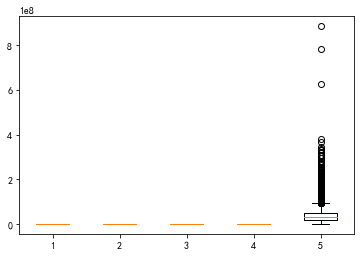

In [34]:
plt.boxplot(tmp) # 成交量数据远远大于其它数据，做标准化
plt.savefig('箱型图')
plt.show()

In [35]:
tmp['成交量']

0       784942350
1       295226270
2       170324450
3       202485930
4       125101600
          ...    
6234     12863850
6235     14261440
6236     17410100
6237     16963480
6238     22079060
Name: 成交量, Length: 6239, dtype: int64

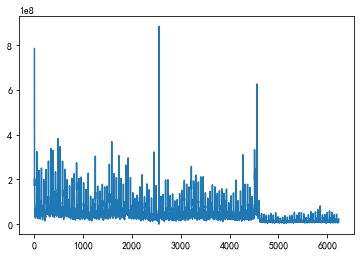

In [36]:
plt.plot(tmp['成交量'])

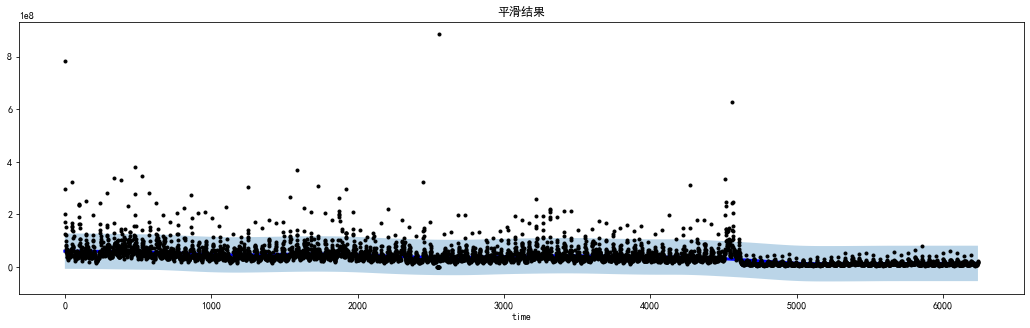

In [37]:
import tsmoothie
# smoother = tsmoothie.KalmanSmoother(component='level')
# smoother = tsmoothie.ExponentialSmoother(window_len=3, alpha=0.3)
smoother = tsmoothie.LowessSmoother(smooth_fraction=0.2, iterations=2)

smoother.smooth(np.array(tmp['成交量']))

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))

plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.title(f"timeseries {0+1}"); plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)
plt.title('平滑结果')
plt.savefig('平滑结果')
plt.show()

In [38]:
tmp['成交量'] = smoother.smooth_data[0]

### 第一问

#### PCA降维

/tmp/ipykernel_1030/442554291.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_price['平均价格'] = merged_data.loc[:, ['最高价', '最低价']].mean(axis=1)


[0.99970639]
          0
0 -0.577275
1 -0.577453
2 -0.577323


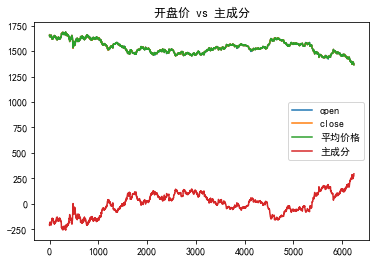

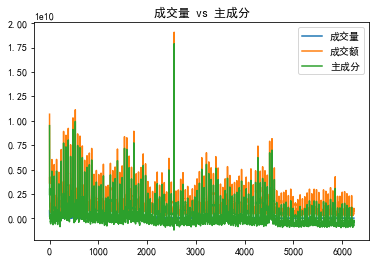

In [39]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams['axes.unicode_minus'] = False

# 分别计算价格和成交量的主成分
pca = PCA(n_components=1)   #降到1维
# 价格的主成分
X_price = merged_data[['open', 'close']]
X_price['平均价格'] = merged_data.loc[:, ['最高价', '最低价']].mean(axis=1)
newX_price = pca.fit_transform(X_price)   
print(pca.explained_variance_ratio_)
print(pd.DataFrame(pca.components_).T)
plt.plot(X_price, label=['open', 'close', '平均价格'])
plt.plot(newX_price, label='主成分')
plt.legend()
plt.title('开盘价 vs 主成分')
plt.savefig('开盘价 vs 主成分')
plt.show()

# 成交量的主成分
X_amount = merged_data[['成交量', '成交额']]
newX_amount = pca.fit_transform(X_amount)
plt.plot(X_amount, label=['成交量', '成交额'])
plt.plot(newX_amount, label='主成分')
plt.title('成交量 vs 主成分')
plt.legend()
plt.savefig('成交量 vs 主成分')
plt.show()

In [80]:
X=merged_data[['中国战略性新兴产业采购经理指数(EPMI):当月值', '社会消费品零售总额:当月值', '全国:居民消费价格指数:当期值',
       '股票市场:期末市价总值', '中国香港:少于10万元人民币的存款利率:12个月:期内平均数',
       '金融机构人民币贷款利率区间占比:等于LPR', 'GDP:现价', '成交量:上证综合指数', '成交金额:上证综合指数',
       '沪市:股票:流通市值', '深市:股票:流通市值', '沪深300指数', '上证综合指数', '中证500指数', '创业板指数',
       '上证50指数', '上证A股指数', '深证成份指数', '深证综合指数', 'VMA', 'VMACD', 'ARBR', 'OBV',
       'BBI', 'DMA', 'MA', 'EXPMA', 'MTM', 'MACD', 'BIAS', 'KDJ', 'RSI',
       'BOLL', '道琼斯工业平均指数', '纳斯达克综合指数', '标准普尔500指数', '美国证交所', '恒生指数',
       '东京日经225指数', '伦敦金融时报100指数', '法国巴黎CAC40指数', '荷兰AEX指数', '俄罗斯RTS指数',
       '意大利MIB指数']]
X = X.drop(X.index[-1])
# X = X.apply(normalize, axis=0) # 标准化
def three_sigma(Ser1):
    '''
    Ser1：表示传入DataFrame的某一列。
    '''
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange

# for i, column in enumerate(X.columns):
#     idx = three_sigma(X[column]).index
#     X.iloc[idx, i] = X[column].median() # 用中位数填充离群值

In [41]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
Y = tmp['成交量']
model = LinearRegression()
model.fit(X,Y)
y_predict = model.predict(X)
r2_score(Y,y_predict)

0.9969235052304668

/home/gumiano/miniconda3/envs/ds_env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


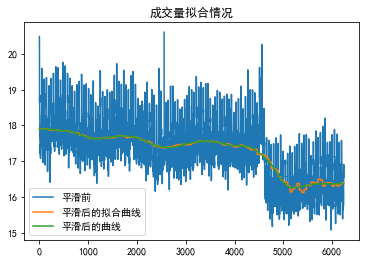

In [43]:
plt.plot(np.log(merged_data['成交量']), label='平滑前')
plt.plot(np.log(y_predict), label='平滑后的拟合曲线')
plt.plot(np.log(Y), label='平滑后的曲线')
plt.title('成交量拟合情况')
plt.legend()    
plt.savefig('成交量拟合情况')
plt.show()

#### XGBoost

0.9877884431698981
0.999793617352162


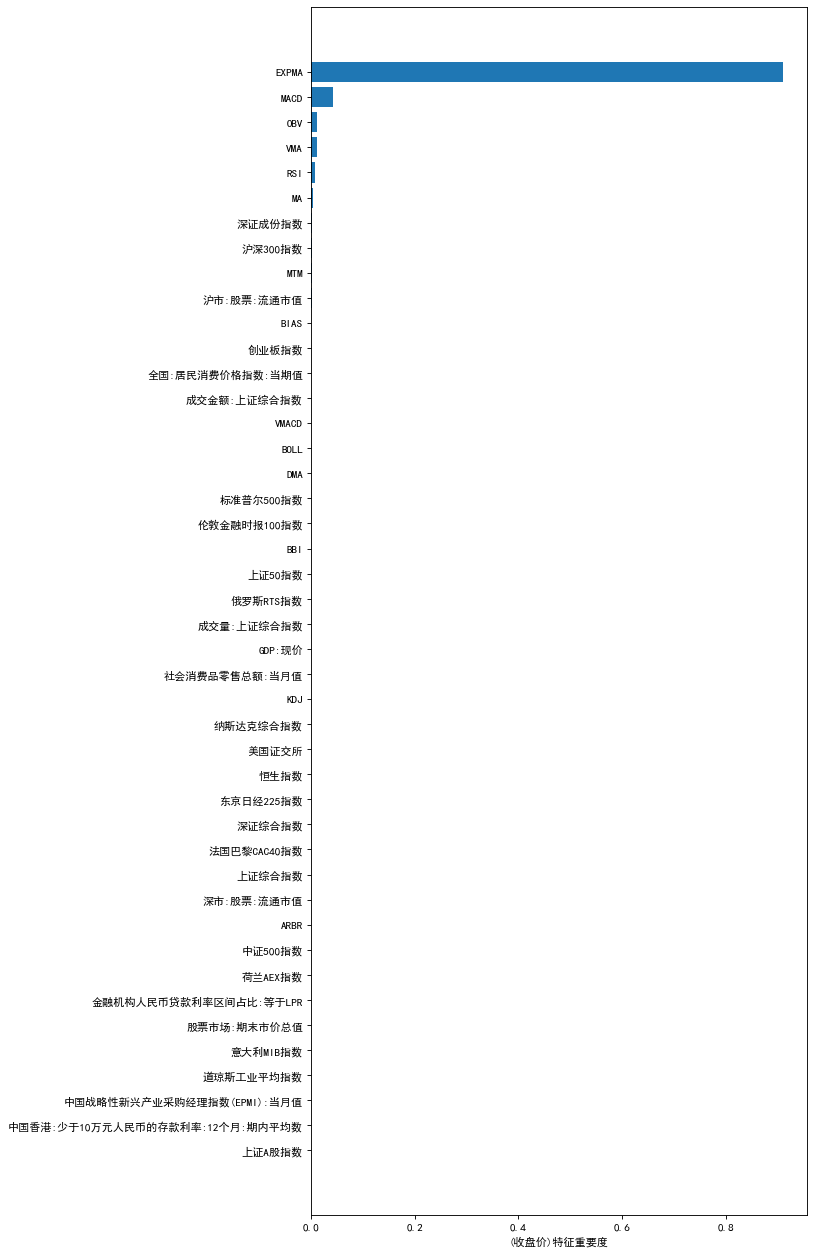

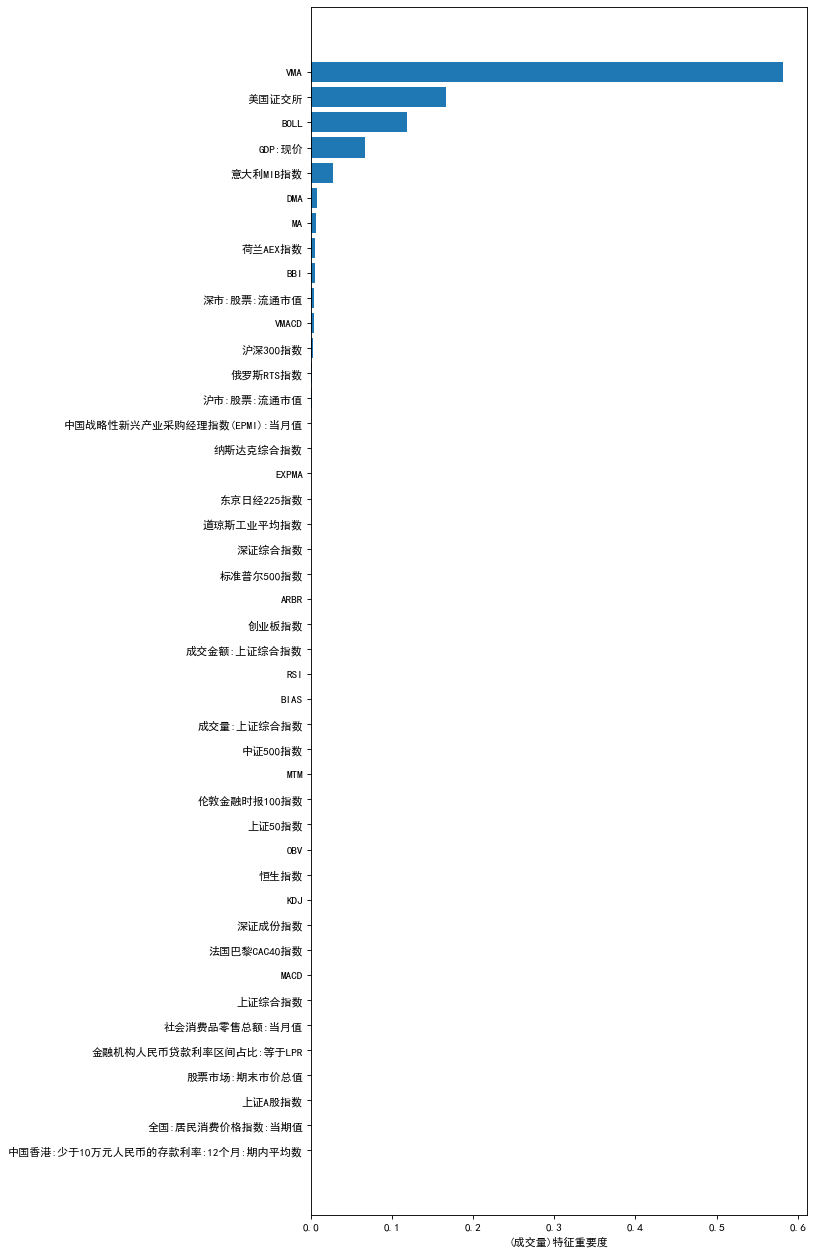

In [44]:
# 收盘价
Y = tmp['close']
model = xgb.XGBRegressor()
model.fit(X,Y)
print(r2_score(Y,model.predict(X)))
sorted_idx_close = model.feature_importances_.argsort()
plt.figure(figsize=(8, 20),dpi=80)
plt.barh(X.columns[sorted_idx_close], model.feature_importances_[sorted_idx_close])
plt.xlabel("(收盘价)特征重要度")
plt.savefig('XGBOOST(收盘价)特征重要度.jpg')

# 成交量
Y = tmp['成交量']
model = xgb.XGBRegressor()
model.fit(X,Y)
print(r2_score(Y,model.predict(X)))
sorted_idx_volume = model.feature_importances_.argsort()
plt.figure(figsize=(8, 20),dpi=80)
plt.barh(X.columns[sorted_idx_volume], model.feature_importances_[sorted_idx_volume])
plt.xlabel("(成交量)特征重要度")
plt.savefig('XGBOOST(成交量)特征重要度.jpg')

#### MAPE评价指标

In [76]:
import numpy as np
 
def mape(y_true, y_pred):
    """
    参数:
    y_true -- 测试集目标真实值
    y_pred -- 测试集目标预测值
    
    返回:
    mape -- MAPE 评价指标
    """
    
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n
    return mape

In [82]:
volume_related_indices = X.iloc[:, sorted_idx_volume[::-1]].iloc[:, :5]
# ['VMA', '美国证交所', '荷兰AEX指数', '股票市场:期末市价总值', 'BOLL', '沪市:股票:流通市值', '社会消费品零售总额:当月值', 'BBI', 'DMA', '深市:股票:流通市值']
# ['VMA', 'VMACD', '沪市:股票:流通市值', 'KDJ', '意大利MIB指数']

### 第二问

In [83]:
Y = merged_data['成交量']
train_X = volume_related_indices.iloc[merged_data[merged_data['时间']=='2021/7/14 9:35:00'].index[0]:merged_data[merged_data['时间']=='2021/12/31 15:00:00'].index[0]]
test_X = volume_related_indices.iloc[merged_data[merged_data['时间']=='2022/1/4 9:35:00'].index[0]:merged_data[merged_data['时间']=='2022/1/28 15:00:00'].index[0]]
train_y = Y.iloc[merged_data[merged_data['时间']=='2021/7/14 9:35:00'].index[0]:merged_data[merged_data['时间']=='2021/12/31 15:00:00'].index[0]]
test_y = Y.iloc[merged_data[merged_data['时间']=='2022/1/4 9:35:00'].index[0]:merged_data[merged_data['时间']=='2022/1/28 15:00:00'].index[0]]

KeyError: '日期'

#### 成交量

In [ ]:
model = xgb.XGBRegressor()
model.fit(train_X,train_y)
predict_y = model.predict(test_X)
mape(test_y, predict_y)

0.3092506965966529

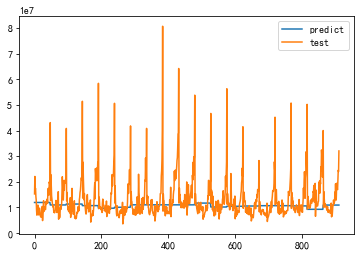

In [ ]:
plt.plot(predict_y, label='predict')
plt.plot(test_y, label='test')
plt.legend()
plt.show()

In [ ]:
dt = pd.Index(merged_data['日期'][:911])

### 第三问

In [ ]:
close_related_indices = X.iloc[:, sorted_idx_close[::-1]].iloc[:, :5]

#### 收盘价

In [ ]:
Y=merged_data['close']

train_X=close_related_indices.iloc[merged_data[merged_data['日期']=='2021/12/31 15:00:00'].index[0]:merged_data[merged_data['日期']=='2021/7/14 9:35:00'].index[0]]
test_X=close_related_indices.iloc[merged_data[merged_data['日期']=='2022/1/28 15:00:00'].index[0]:merged_data[merged_data['日期']=='2022/1/4 9:35:00'].index[0]]
train_y=Y.iloc[merged_data[merged_data['日期']=='2021/12/31 15:00:00'].index[0]:merged_data[merged_data['日期']=='2021/7/14 9:35:00'].index[0]]
test_y=Y.iloc[merged_data[merged_data['日期']=='2022/1/28 15:00:00'].index[0]:merged_data[merged_data['日期']=='2022/1/4 9:35:00'].index[0]]

In [ ]:
model = xgb.XGBRegressor()
model.fit(train_X,train_y)
predict_y = model.predict(test_X)
mape(test_y, predict_y)

0.028008153224357506

In [94]:
merged_data['预测收盘价'] = model.predict(close_related_indices)

ValueError: Length of values (6239) does not match length of index (6240)

KeyError: '预测收盘价'

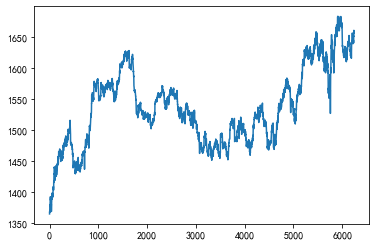

In [ ]:
plt.plot(merged_data['close'], label='收盘价')
plt.plot(merged_data['预测收盘价'], label='预测')
plt.legend()
plt.savefig('对收盘价的预测')
plt.show()

In [95]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model

model = Sequential()
model.add(LSTM(5, input_shape=(None,1)))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_y, epochs=100, batch_size=10, verbose=2)
model.save(os.path.join("DATA","Test" + ".h5"))

2022-05-23 21:44:52.409922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
533/533 - 6s - loss: 2395244.5000 - 6s/epoch - 10ms/step
Epoch 2/100


### 第四问

#### 模拟交易

In [170]:
tmp = pd.concat((test_y, pd.DataFrame(model.predict(test_X))), axis=1)
tmp['日期'] = dt
tmp['close'] = merged_data['close']
tmp = tmp.rename({0: '预测收盘价'}, axis=1)
tmp.to_csv('收盘价.csv', index=False)
# pd.DataFrame([list(test_y), model.predict(test_X)], columns=['close', '收盘价预测值'], index=dt)

In [171]:
tmp = pd.concat((tmp, merged_data.iloc[[911]][['close', '预测收盘价', '日期']]))

In [172]:
tmp['涨跌情况'] = None
tmp.loc[911, '预测收盘价'] = tmp.loc[911, 'close']
tmp['持有'] = 0
tmp['总市值'] = None
tmp['总资金'] = None
tmp

,close,预测收盘价,日期,涨跌情况,持有,总市值,总资金
0,1365.1880,1459.730835,2022-01-28 15:00:00,None,0,None,None
1,1366.1420,1459.730835,2022-01-28 14:55:00,None,0,None,None
2,1368.8356,1459.730835,2022-01-28 14:50:00,None,0,None,None
3,1367.4127,1459.730835,2022-01-28 14:45:00,None,0,None,None
4,1372.6644,1459.730835,2022-01-28 14:40:00,None,0,None,None
...,...,...,...,...,...,...,...
907,1565.7114,1542.619019,2022-01-04 09:55:00,None,0,None,None
908,1566.6184,1542.619019,2022-01-04 09:50:00,None,0,None,None
909,1570.8784,1542.619019,2022-01-04 09:45:00,None,0,None,None
910,1572.6150,1542.619019,2022-01-04 09:40:00,None,0,None,None


In [173]:
import math
# rate = 0.003 # 佣金
hold = math.floor(1000000 / (tmp.loc[911, 'close'] * 1.003))
tmp.loc[911, '持有'] = hold
tmp.loc[911, '总市值'] = hold * tmp.loc[911, 'close']
tmp.loc[911, '总资金'] = 1000000
# for idx in range(911, 0, -1):
tmp

,close,预测收盘价,日期,涨跌情况,持有,总市值,总资金
0,1365.1880,1459.730835,2022-01-28 15:00:00,None,0,None,None
1,1366.1420,1459.730835,2022-01-28 14:55:00,None,0,None,None
2,1368.8356,1459.730835,2022-01-28 14:50:00,None,0,None,None
3,1367.4127,1459.730835,2022-01-28 14:45:00,None,0,None,None
4,1372.6644,1459.730835,2022-01-28 14:40:00,None,0,None,None
...,...,...,...,...,...,...,...
907,1565.7114,1542.619019,2022-01-04 09:55:00,None,0,None,None
908,1566.6184,1542.619019,2022-01-04 09:50:00,None,0,None,None
909,1570.8784,1542.619019,2022-01-04 09:45:00,None,0,None,None
910,1572.6150,1542.619019,2022-01-04 09:40:00,None,0,None,None


In [174]:
import math
for i in range(tmp.shape[0]-2,0,-1):
    predict_close = tmp.loc[i-1,'预测收盘价']
    close = tmp.loc[i,'close']
    sz = tmp.loc[i+1,'总市值']
    amount = tmp.loc[i+1,'总资金']
    hold = tmp.loc[i+1,'持有']
    if (hold!=0) & (predict_close < close): #如果有仓位 下一个收盘价小于当前收盘价那就执行以当前收盘价卖出
        tmp.loc[i,'总资金'] = amount- sz + hold * close * 0.997
        tmp.loc[i,'总市值'] = 0
        tmp.loc[i,'持有'] = 0
    elif((hold==0) & (predict_close < close)) | ((hold!=0) & (predict_close > close)):#不执行操作
        tmp.loc[i,'总资金'] = amount
        tmp.loc[i,'总市值'] = sz
        tmp.loc[i,'持有'] = hold
    elif (hold==0) & (predict_close > close): #如果没仓位 下一个收盘价大于当前收盘价那就执行以当前收盘价买入
        tmp.loc[i,'总资金'] = amount
        tmp.loc[i,'持有'] = int(amount / (close * 1.003))
        tmp.loc[i, '总市值'] = tmp.loc[i,'持有'] * close
    else:        
        pass

tmp

,close,预测收盘价,日期,涨跌情况,持有,总市值,总资金
0,1365.1880,1459.730835,2022-01-28 15:00:00,None,0,None,None
1,1366.1420,1459.730835,2022-01-28 14:55:00,None,648,944733.1968,948227.459045
2,1368.8356,1459.730835,2022-01-28 14:50:00,None,648,944733.1968,948227.459045
3,1367.4127,1459.730835,2022-01-28 14:45:00,None,648,944733.1968,948227.459045
4,1372.6644,1459.730835,2022-01-28 14:40:00,None,648,944733.1968,948227.459045
...,...,...,...,...,...,...,...
907,1565.7114,1542.619019,2022-01-04 09:55:00,None,0,0,994980.75396
908,1566.6184,1542.619019,2022-01-04 09:50:00,None,0,0,994980.75396
909,1570.8784,1542.619019,2022-01-04 09:45:00,None,0,0,994980.75396
910,1572.6150,1542.619019,2022-01-04 09:40:00,None,0,0,994980.75396


In [175]:
tmp.loc[0, '持有'] = 643
tmp.loc[0, '总市值'] = 944733.1968
tmp.loc[0, '总资金'] = 948227.459045
tmp

,close,预测收盘价,日期,涨跌情况,持有,总市值,总资金
0,1365.1880,1459.730835,2022-01-28 15:00:00,None,643,944733.1968,948227.459045
1,1366.1420,1459.730835,2022-01-28 14:55:00,None,648,944733.1968,948227.459045
2,1368.8356,1459.730835,2022-01-28 14:50:00,None,648,944733.1968,948227.459045
3,1367.4127,1459.730835,2022-01-28 14:45:00,None,648,944733.1968,948227.459045
4,1372.6644,1459.730835,2022-01-28 14:40:00,None,648,944733.1968,948227.459045
...,...,...,...,...,...,...,...
907,1565.7114,1542.619019,2022-01-04 09:55:00,None,0,0,994980.75396
908,1566.6184,1542.619019,2022-01-04 09:50:00,None,0,0,994980.75396
909,1570.8784,1542.619019,2022-01-04 09:45:00,None,0,0,994980.75396
910,1572.6150,1542.619019,2022-01-04 09:40:00,None,0,0,994980.75396


In [176]:
tmp.to_csv('第四题.csv', index=False)

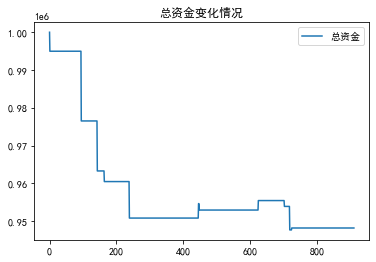

In [177]:
tmp['总资金'][::-1].reset_index().drop('index', axis=1).plot()
plt.title('总资金变化情况')
plt.savefig('总资金变化情况')
plt.show()

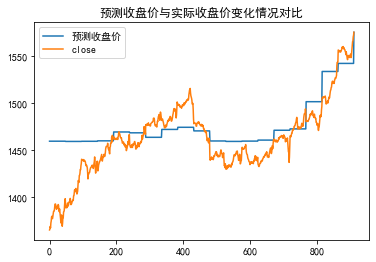

In [178]:
tmp['预测收盘价'].plot()
tmp['close'].plot()
plt.legend()
plt.title('预测收盘价与实际收盘价变化情况对比')
plt.savefig('预测收盘价与实际收盘价变化情况对比')
plt.show()

#### 总收益率

In [175]:
StockPrices=pd.DataFrame(model.predict(test_X),columns=['收盘价'])
StockPrices['time']=merged_data.iloc[merged_data[merged_data['时间']=='2022/1/4 9:35:00'].index[0]:merged_data[merged_data['时间']=='2022/1/28 15:00:00'].index[0]]['时间']

In [176]:
StockPrices

,收盘价,time
0,1459.730835,2022-01-28 15:00:00
1,1459.730835,2022-01-28 14:55:00
2,1459.730835,2022-01-28 14:50:00
3,1459.730835,2022-01-28 14:45:00
4,1459.730835,2022-01-28 14:40:00
...,...,...
906,1542.619019,2022-01-04 10:00:00
907,1542.619019,2022-01-04 09:55:00
908,1542.619019,2022-01-04 09:50:00
909,1542.619019,2022-01-04 09:45:00


In [177]:
StockPrices.sort_values(by='time',inplace=True)
StockPrices.head()

,收盘价,time
910,1542.619019,2022-01-04 09:40:00
909,1542.619019,2022-01-04 09:45:00
908,1542.619019,2022-01-04 09:50:00
907,1542.619019,2022-01-04 09:55:00
906,1542.619019,2022-01-04 10:00:00


In [178]:
StockPrices['date']=pd.to_datetime(StockPrices['time'],format="%m-%d-%Y").dt.strftime("%Y-%m-%d")

In [179]:
StockPrices

,收盘价,time,date
910,1542.619019,2022-01-04 09:40:00,2022-01-04
909,1542.619019,2022-01-04 09:45:00,2022-01-04
908,1542.619019,2022-01-04 09:50:00,2022-01-04
907,1542.619019,2022-01-04 09:55:00,2022-01-04
906,1542.619019,2022-01-04 10:00:00,2022-01-04
...,...,...,...
4,1459.730835,2022-01-28 14:40:00,2022-01-28
3,1459.730835,2022-01-28 14:45:00,2022-01-28
2,1459.730835,2022-01-28 14:50:00,2022-01-28
1,1459.730835,2022-01-28 14:55:00,2022-01-28


In [180]:
ddd=StockPrices.groupby('date').head(1)
ddd.reset_index(inplace=True,drop=True)
ddd.columns=['开盘价', 'time', 'date']
ccc=StockPrices.groupby('date').tail(1)
ccc.reset_index(inplace=True,drop=True)
eee=pd.concat([ddd[['开盘价', 'date']],ccc['收盘价']],axis=1)
eee

,开盘价,date,收盘价
0,1542.619019,2022-01-04,1542.619019
1,1534.030273,2022-01-05,1534.030273
2,1501.833008,2022-01-06,1501.833008
3,1472.841309,2022-01-07,1472.841309
4,1471.403809,2022-01-10,1471.403809
5,1460.905396,2022-01-11,1460.905396
6,1459.830933,2022-01-12,1459.830933
7,1459.503906,2022-01-13,1459.503906
8,1459.972046,2022-01-14,1459.972046
9,1470.716309,2022-01-17,1470.716309


In [181]:
eee['当日收益率']=eee['收盘价'].pct_change()

In [182]:
zongshouyi=1
for i in eee['当日收益率']:
    if np.isnan(i)==False:
        zongshouyi=zongshouyi*(1+i)

zongshouyi = zongshouyi - 1
zongshouyi

-0.05373198622723574

#### 信息比率

In [183]:
# 超额收益率
tmp = tempdata.iloc[tempdata[tempdata['时间aaa']=='2022/1/28 15:00:00'].index[0]:tempdata[tempdata['时间aaa']=='2022/1/4 9:35:00'].index[0]]
tmp = tmp[['中证500指数', 'dt']]
# pd.to_datetime(StockPrices['time'],format="%m-%d-%Y").dt.strftime("%Y-%m-%d")
tmp = tmp.groupby('dt').tail(1).reset_index().drop(columns=['index'])
ex_return = eee['当日收益率'] - tmp['中证500指数'].pct_change() * 0.9
daily_ex_return = ex_return / sum(~ex_return.isnull())

# 信息比率
information= daily_ex_return / ex_return.std()
information

0          NaN
1    -0.035880
2    -0.178840
3    -0.056282
4    -0.128506
5    -0.026974
6    -0.043969
7    -0.032263
8    -0.021005
9     0.031853
10    0.048646
11   -0.014487
12   -0.072586
13    0.043613
14   -0.025732
15   -0.017668
16   -0.028348
17    0.003201
18   -0.064505
dtype: float64

#### 最大回撤率

In [184]:
p_d=((eee['当日收益率'].cummax()-eee['当日收益率'])/eee['当日收益率'].cummax()).max()

#打印结果

print(f'最大回撤率计算结果：{round(p_d*100,2)}%')

最大回撤率计算结果：187.31%
